In [19]:
# Make single ALT Data
from reliability.Other_functions import make_ALT_data
from reliability.ALT_fitters import Fit_Weibull_Exponential, Fit_Lognormal_Exponential, Fit_Normal_Exponential, Fit_Exponential_Exponential, Fit_Exponential_Power
import matplotlib.pyplot as plt

# Weibull Power
use_level_stress = 300
ALT_data = make_ALT_data(distribution='Weibull',life_stress_model='Eyring',a=1500,c=-10,beta=2,stress_1=[500,400,350],number_of_samples=100,fraction_censored=0.2,seed=1)

fit = Fit_Exponential_Exponential(
    failures=ALT_data.failures, 
    failure_stress=ALT_data.failure_stresses, 
    right_censored=ALT_data.right_censored, 
    right_censored_stress=ALT_data.right_censored_stresses,
    use_level_stress=use_level_stress, 
    show_probability_plot=False, 
    show_life_stress_plot=False,
)


Results from Fit_Exponential_Exponential (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 240/60 (20% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
        a         1899.08         180.341   1545.62   2252.54
        b         19.2854         8.61963   8.03123   46.3099 

 stress  weibull alpha  weibull beta  new 1/Lambda  common shape shape change  acceleration factor
    500        945.271       1.94553       860.491             1       -48.6%              12.5799
    400         2193.3       1.75376       2223.95             1      -42.98%              4.86742
    350        4822.96       2.11256        4382.1             1      -52.66%              2.47026
The shape parameter has been found to change significantly (>50%) when fitting the ALT model.
This may indicate that a different failure mode is acting at different stress levels or that the Exponential distribution may not be appropriate.


100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 154.51it/s]


Results from Fit_Exponential_Exponential_Bayesian (95% CrI):
Analysis method: Bayesian Estimation
Failures / Right censored: 240/60 (20% right censored)

Parameter  Post Mean  Post Std  Post Median  Lower 95% CrI  Upper 95% CrI
        a    1821.43   84.6802      1822.72         1653.4        1984.11
        b    23.9036   5.27019      23.3767         15.245        35.7964 

At the use level stress(es) of 300, the mean life (posterior) is 10357



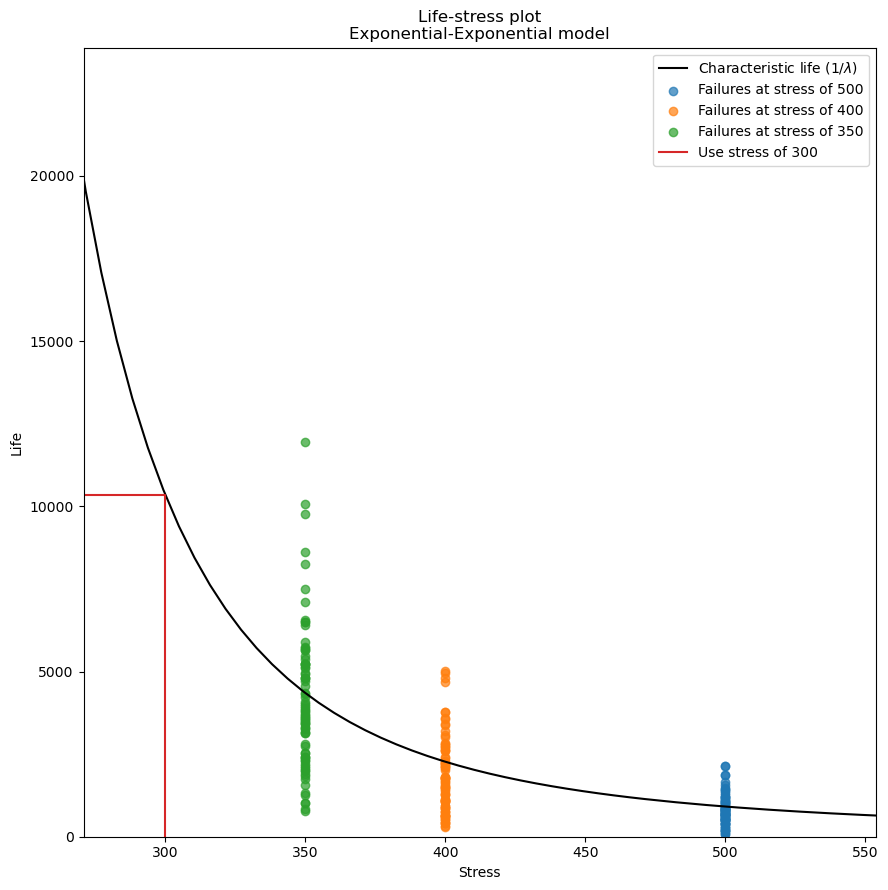

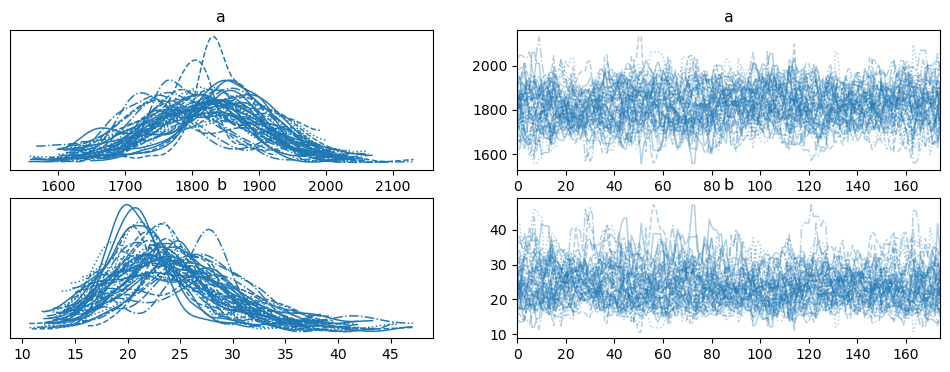

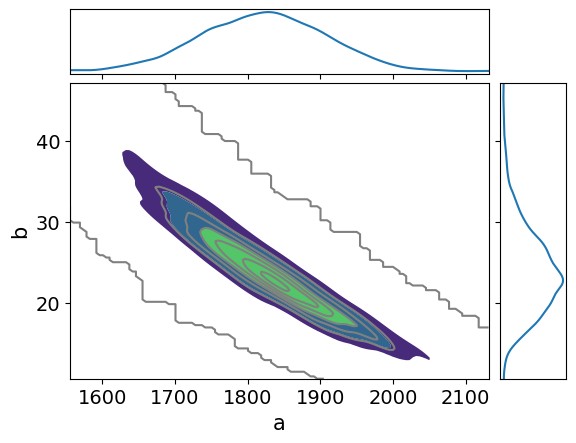

In [20]:
# Exponential Fits
from reliability.ALT_Bayesian_fitters import (
    Fit_Weibull_Exponential_Bayesian,
    Fit_Lognormal_Exponential_Bayesian, 
    Fit_Normal_Exponential_Bayesian,    
    Fit_Exponential_Exponential_Bayesian, 
)

# from reliability.ALT_Bayesian_fitters_W import Fit_Weibull_Eyring_Bayesian

fit = Fit_Exponential_Exponential_Bayesian(
    failures=ALT_data.failures, 
    failure_stress=ALT_data.failure_stresses, 
    right_censored=ALT_data.right_censored, 
    right_censored_stress=ALT_data.right_censored_stresses, 
    use_level_stress=use_level_stress,
    priors={
        'a': ("Normal", 1800, 100.0),
        'b': ("Lognormal", 3, 1.0),
        # 'c': ("Normal", -10, 0.5),
        # 'm': ("Normal", 0.0, 1.0),        
        # 'n': ("Normal", -2, 1.0),
        # 'sigma': ("Lognormal", 7.0, 1.0)
        # 'beta': ("Lognormal", 1.0, 1.0)
    },
    n_walkers=48, n_steps=500, burn=150, thin=2,
    show_bayes_plots=True,   # <— turn on ArviZ plots
    progress=True
)


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:15<00:00, 99.82it/s]


Results from Fit_Exponential_Power_Bayesian (95% CrI):
Analysis method: Bayesian Estimation
Failures / Right censored: 240/60 (20% right censored)

Parameter   Post Mean    Post Std  Post Median  Lower 95% CrI  Upper 95% CrI
        a 3.50386e+15 5.86927e+15  1.02772e+15    2.92671e+13    2.30629e+16
        n    -4.46149     0.31019     -4.47584       -4.99152       -3.88946 

At the use level stress(es) of 300, the mean life (posterior) is 31110



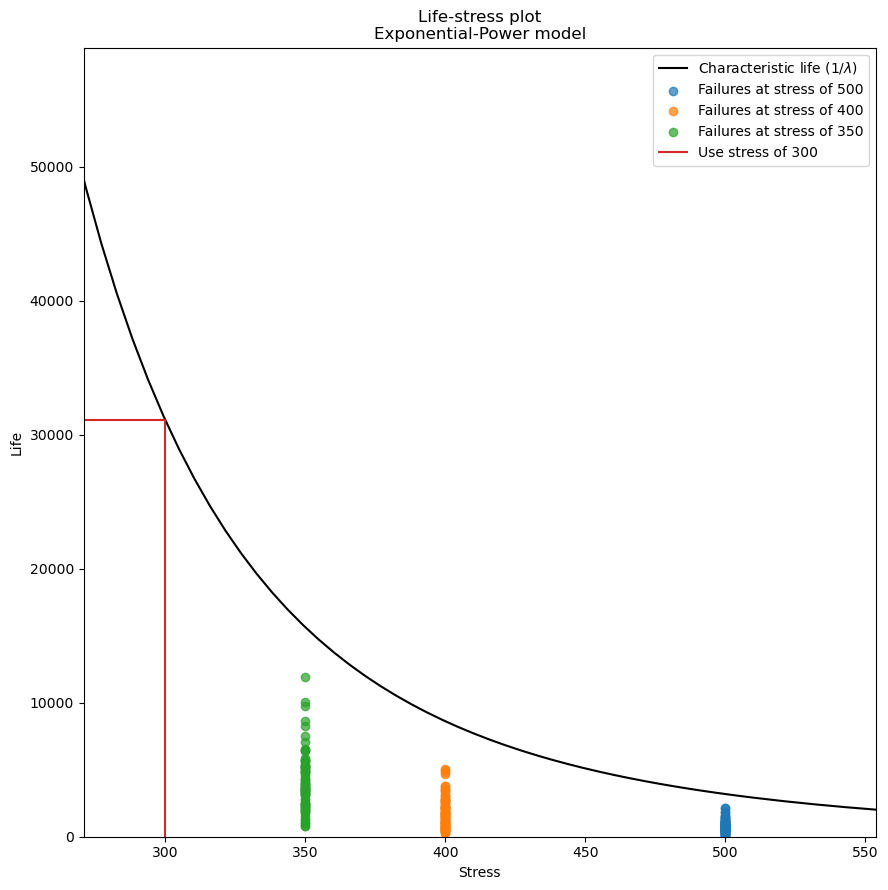

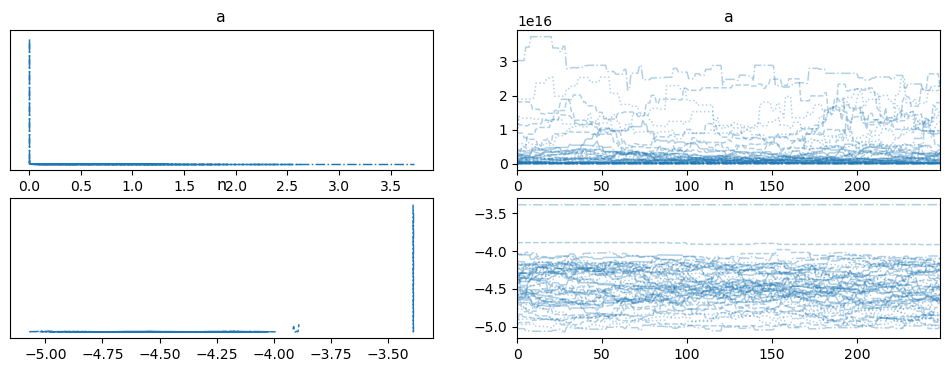

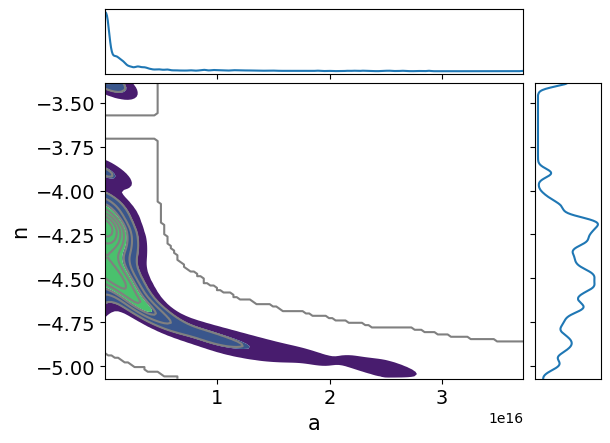

In [17]:
# Power Fits
from reliability.ALT_Bayesian_fitters import (
    Fit_Weibull_Power_Bayesian,
    Fit_Lognormal_Power_Bayesian, 
    Fit_Normal_Power_Bayesian,    
    Fit_Exponential_Power_Bayesian, 
)

# from reliability.ALT_Bayesian_fitters_W import Fit_Weibull_Eyring_Bayesian

fit = Fit_Exponential_Power_Bayesian(
    failures=ALT_data.failures, 
    failure_stress=ALT_data.failure_stresses, 
    right_censored=ALT_data.right_censored, 
    right_censored_stress=ALT_data.right_censored_stresses, 
    use_level_stress=use_level_stress,
    priors={
        'a': ("Lognormal", 33, 5),
        # 'b': ("Normal", -1, 1.0),
        # 'c': ("Normal", -10, 0.5),
        # 'm': ("Normal", 0.0, 1.0),        
        'n': ("Normal", -4.5, 1.0),
        # 'sigma': ("Lognormal", 0, 1.0)
        # 'beta': ("Lognormal", 1.0, 1.0)
    },
    n_walkers=48, n_steps=1500, burn=1000, thin=2,
    show_bayes_plots=True,   # <— turn on ArviZ plots
    progress=True
)


100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 156.82it/s]


Results from Fit_Exponential_Eyring_Bayesian (95% CrI):
Analysis method: Bayesian Estimation
Failures / Right censored: 240/60 (20% right censored)

Parameter  Post Mean  Post Std  Post Median  Lower 95% CrI  Upper 95% CrI
        a    1490.94   81.0915      1489.99        1336.72        1649.69
        c   -9.98447  0.204215     -9.98732       -10.3798       -9.57831 

At the use level stress(es) of 300, the mean life (posterior) is 10410



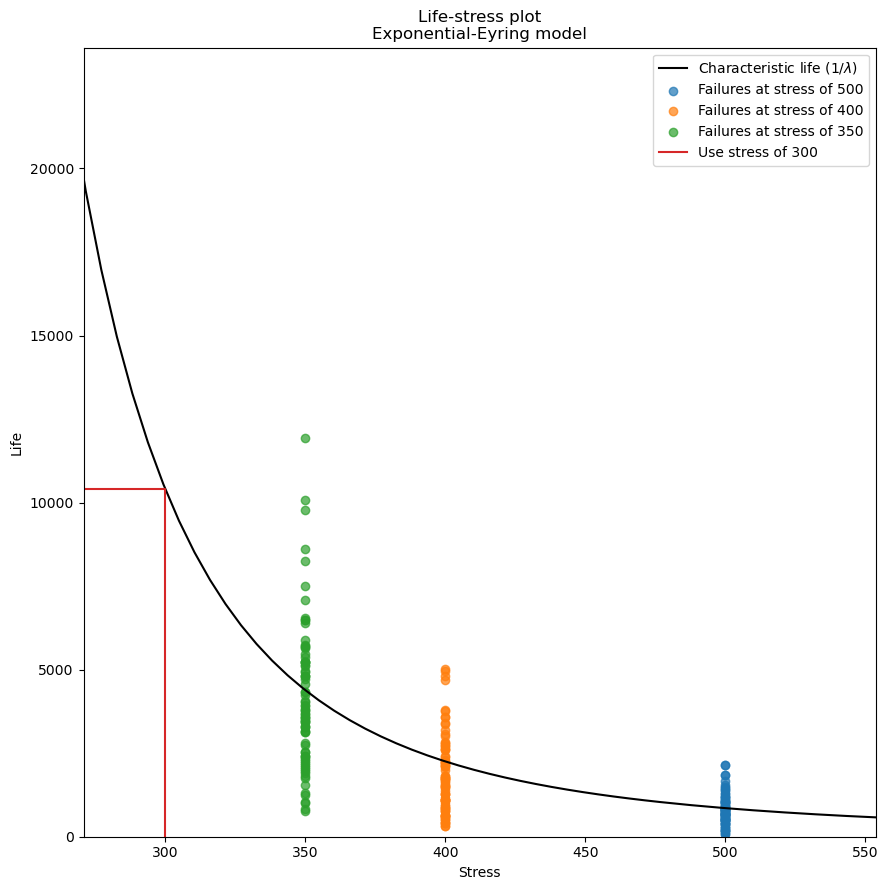

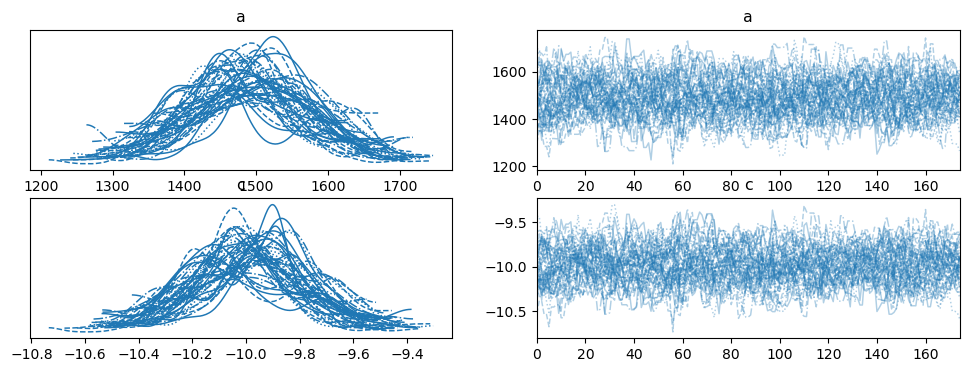

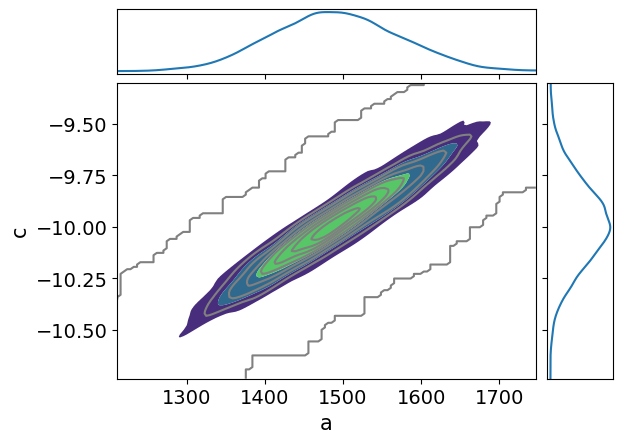

In [4]:
# Eyring Fits
from reliability.ALT_Bayesian_fitters import (
    Fit_Weibull_Eyring_Bayesian,
    Fit_Lognormal_Eyring_Bayesian, 
    Fit_Normal_Eyring_Bayesian,    
    Fit_Exponential_Eyring_Bayesian, 
)

# from reliability.ALT_Bayesian_fitters_W import Fit_Weibull_Eyring_Bayesian

fit = Fit_Exponential_Eyring_Bayesian(
    failures=ALT_data.failures, 
    failure_stress=ALT_data.failure_stresses, 
    right_censored=ALT_data.right_censored, 
    right_censored_stress=ALT_data.right_censored_stresses, 
    use_level_stress=use_level_stress,
    priors={
        'a': ("Normal", 1500, 100.0),
        # 'b': ("Normal", -1, 1.0),
        'c': ("Normal", -10, 0.5),
        # 'm': ("Normal", 0.0, 1.0),        
        # 'n': ("Normal", -2, 1.0),
        # 'sigma': ("Lognormal", 0, 1.0)
        # 'beta': ("Lognormal", 1.0, 1.0)
    },
    n_walkers=48, n_steps=500, burn=150, thin=2,
    show_bayes_plots=True,   # <— turn on ArviZ plots
    progress=True
)


In [5]:
# Make Dual ALT Data
from reliability.Other_functions import make_ALT_data
from reliability.ALT_fitters import Fit_Weibull_Power_Exponential, Fit_Weibull_Dual_Exponential, Fit_Weibull_Dual_Power
import matplotlib.pyplot as plt

# Weibull Power
# use_level_stress = 50
# ALT_data = make_ALT_data(distribution='Weibull',life_stress_model='Power',a=3e6,n=-2,beta=2.5,stress_1=[300,200,100],number_of_samples=100,fraction_censored=0.2,seed=1,use_level_stress=use_level_stress)

# Weibull_Dual_Exponential
use_level_stress = [250, 5]
ALT_data = make_ALT_data(distribution='Weibull', life_stress_model='Dual_Exponential', a=50, b=0.1, c=500, beta=2.5, stress_1=[500, 400, 350, 420, 245], stress_2=[12, 8, 6, 9, 10], number_of_samples=100, fraction_censored=0.5, seed=1,use_level_stress=use_level_stress)

fit = Fit_Weibull_Dual_Power(
    failures=ALT_data.failures, 
    failure_stress_1=ALT_data.failure_stresses_1, 
    failure_stress_2=ALT_data.failure_stresses_2, 
    right_censored=ALT_data.right_censored, 
    right_censored_stress_1=ALT_data.right_censored_stresses_1, 
    right_censored_stress_2=ALT_data.right_censored_stresses_2, 
    use_level_stress=use_level_stress, 
    show_probability_plot=False, 
    show_life_stress_plot=False,
)


Results from Fit_Weibull_Dual_Power (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 250/250 (50% right censored) 

Parameter  Point Estimate  Standard Error   Lower CI   Upper CI
        c         2202.63         1337.22    670.158    7239.48
        m       -0.285077        0.104578  -0.490047 -0.0801074
        n        0.214685        0.104453 0.00996078   0.419409
     beta          2.5696        0.115353    2.35317    2.80593 

 stress  original alpha  original beta  new alpha  common beta beta change  acceleration factor
500, 12         659.184        2.42663    638.574       2.5696      +5.89%               1.0097
 420, 9         624.777        2.89859    630.921       2.5696     -11.35%              1.02194
 400, 8         570.092        2.32484    623.783       2.5696     +10.53%              1.03364
 350, 6         641.326         2.8221    609.177       2.5696      -8.95%              1.05842
245, 10          754.07   

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:07<00:00, 65.45it/s]


Results from Fit_Normal_Dual_Power_Bayesian (95% CrI):
Analysis method: Bayesian Estimation
Failures / Right censored: 250/250 (50% right censored)

Parameter  Post Mean  Post Std  Post Median  Lower 95% CrI  Upper 95% CrI
        c    1716.52   904.111      1544.57        520.101        4391.94
        m  -0.224397 0.0863556    -0.230199      -0.395982     -0.0371253
        n   0.164479   0.10616      0.16193     -0.0463948       0.372788
    sigma    230.897   9.42629      230.213        213.769        251.172 

At the use level stress(es) of [250, 5], the mean life (posterior) is 647.93



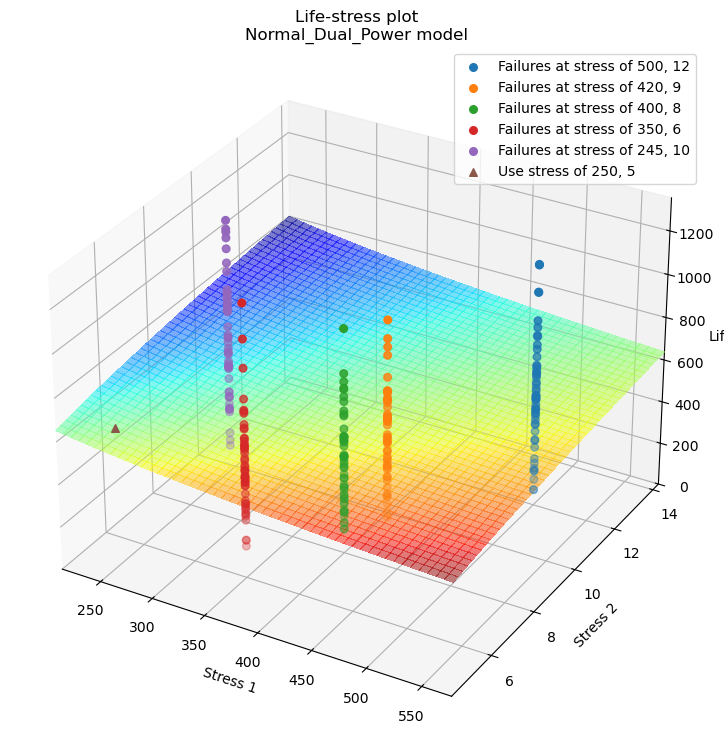

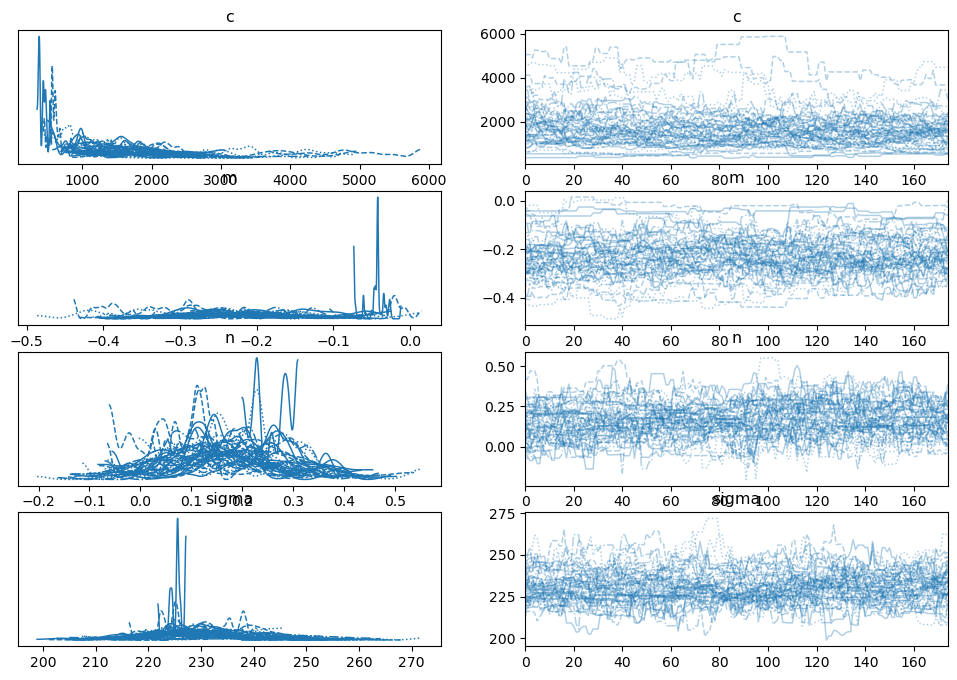

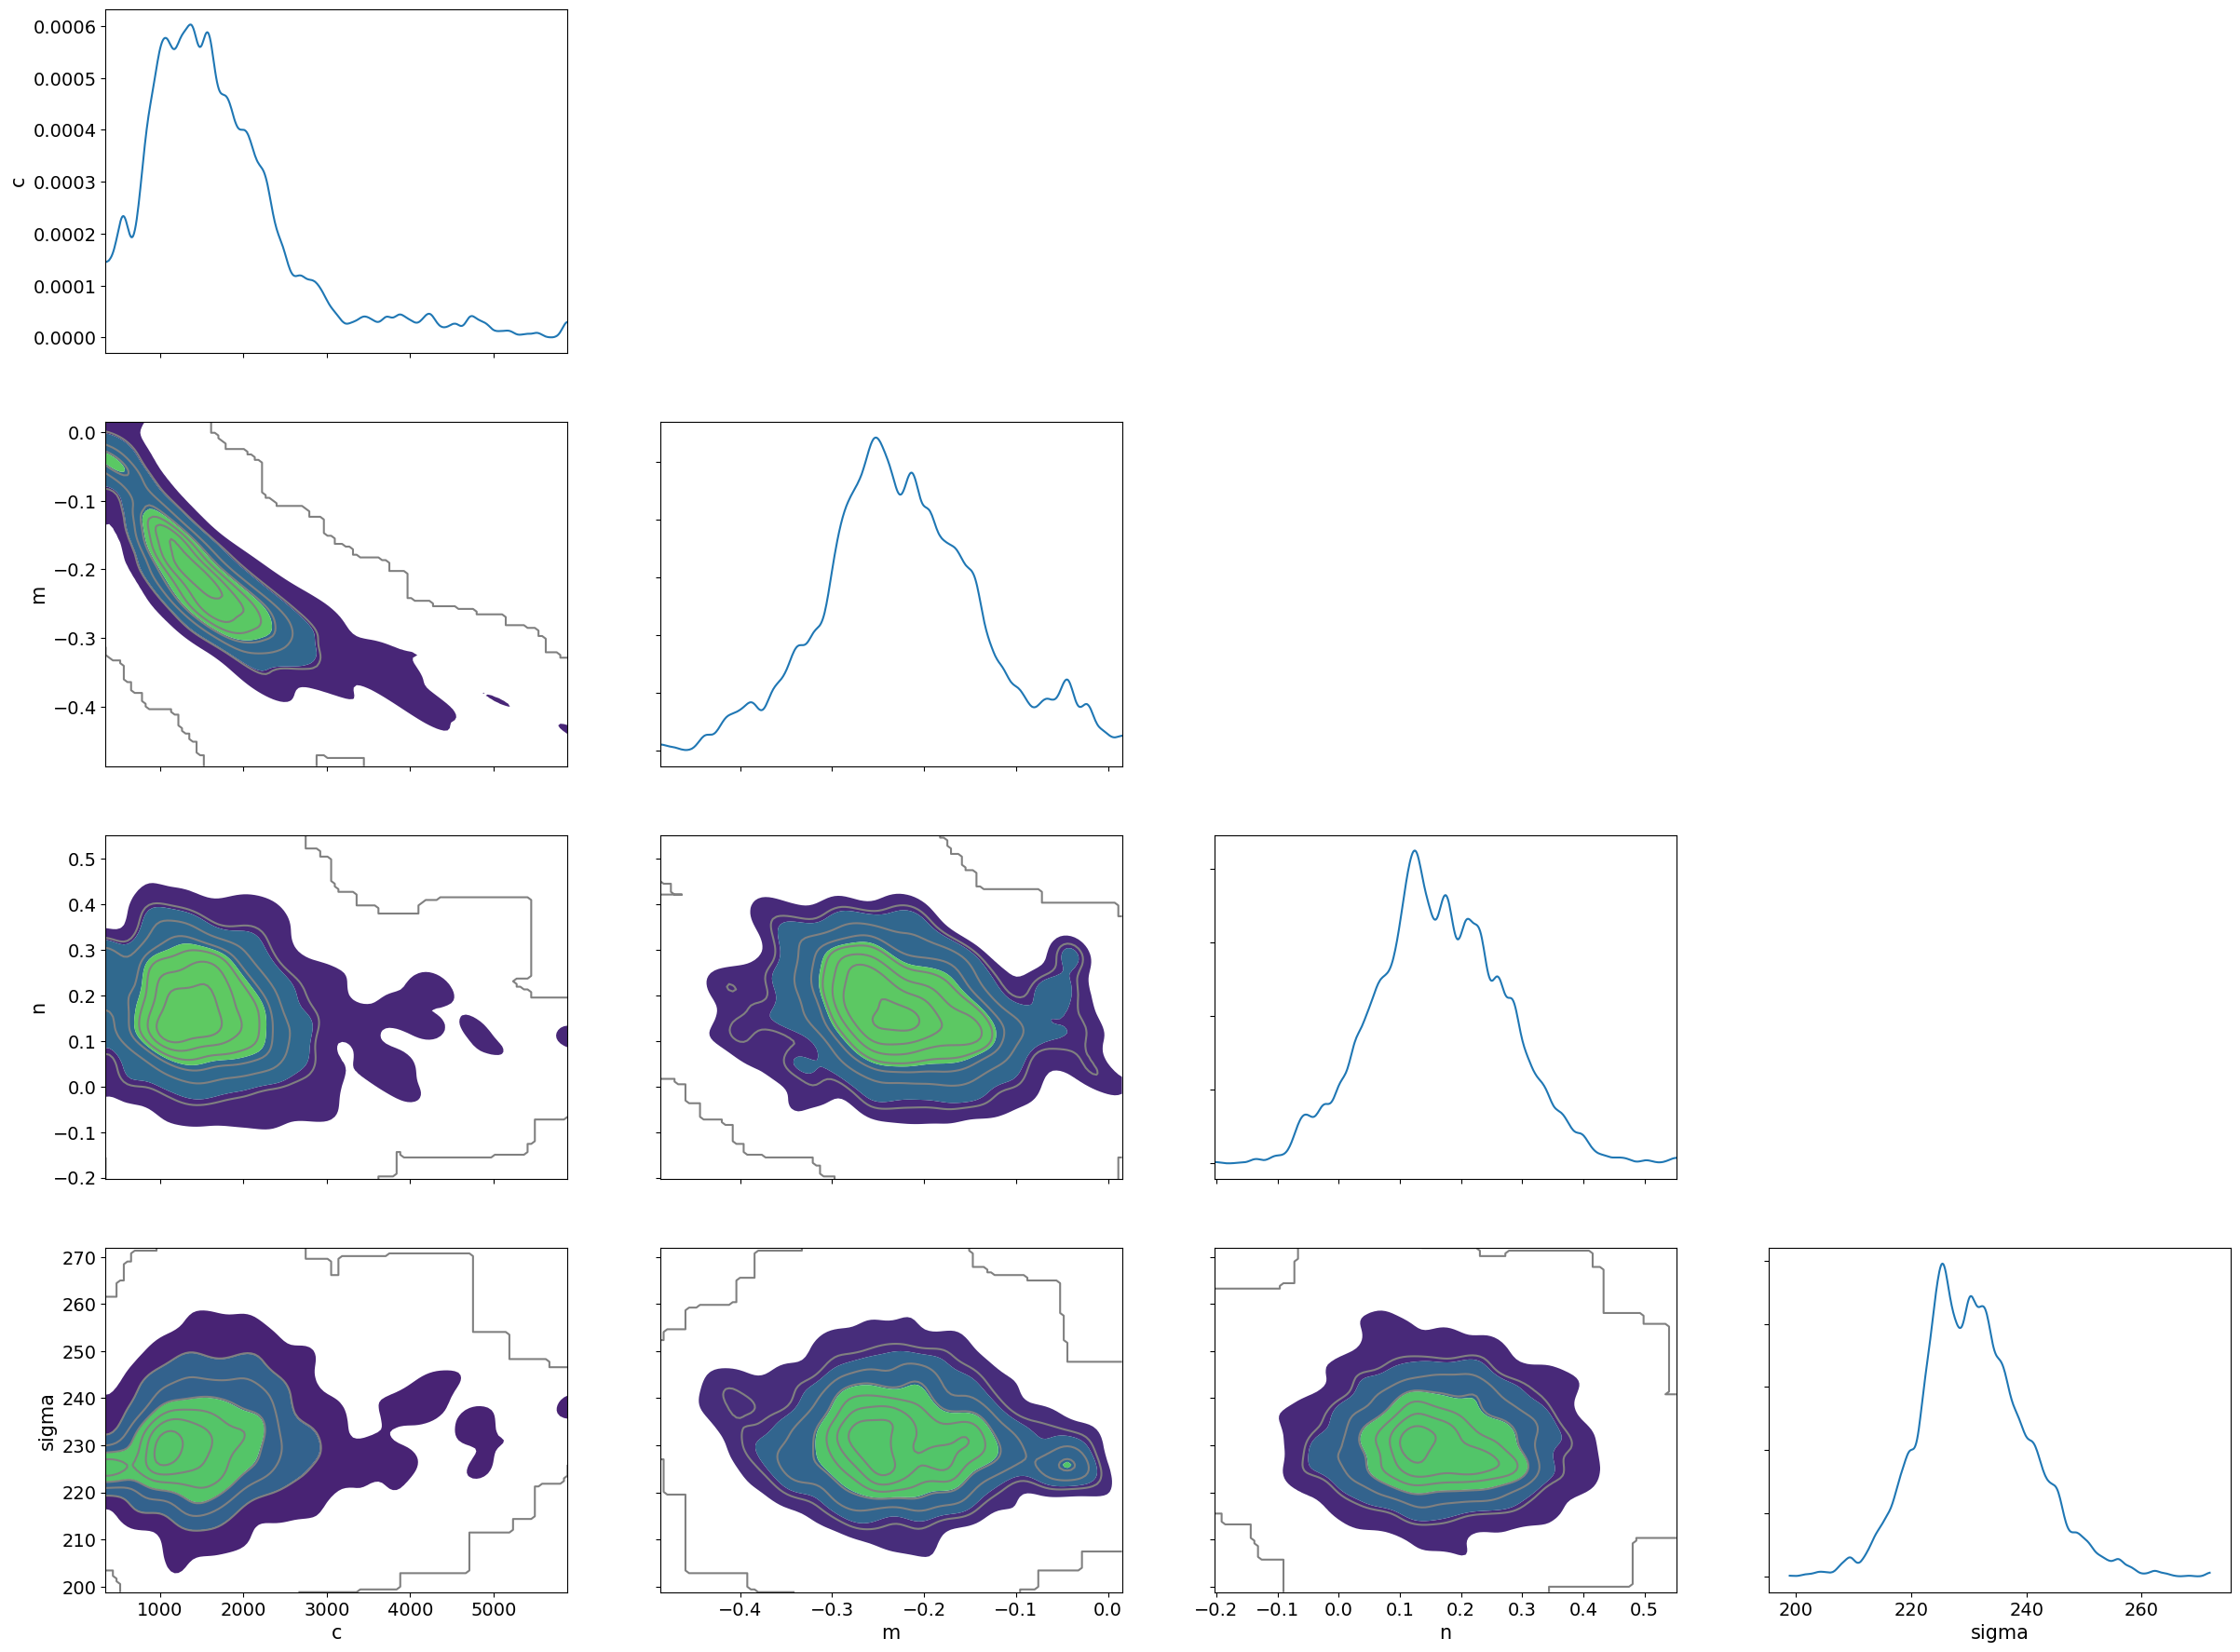

In [6]:
# Dual Power Fits
from reliability.ALT_Bayesian_fitters import (
    Fit_Weibull_Dual_Power_Bayesian, 
    Fit_Lognormal_Dual_Power_Bayesian, 
    Fit_Normal_Dual_Power_Bayesian,    
    Fit_Exponential_Dual_Power_Bayesian, 
)

fit = Fit_Normal_Dual_Power_Bayesian(
    failures=ALT_data.failures, 
    failure_stress_1=ALT_data.failure_stresses_1, 
    failure_stress_2=ALT_data.failure_stresses_2, 
    right_censored=ALT_data.right_censored, 
    right_censored_stress_1=ALT_data.right_censored_stresses_1, 
    right_censored_stress_2=ALT_data.right_censored_stresses_2, 
    use_level_stress=use_level_stress,
    priors={
        # 'a': ("Normal", 95, 6),
        # 'b': ("Normal", -1, 1.0),
        'c': ("Lognormal", 7.5, 2.0),
        'm': ("Normal", 0.0, 1.0),        
        'n': ("Normal", 0.0, 1.0),
        'sigma': ("Lognormal", -0.6, 1.0)
        # 'beta': ("Lognormal", 1.0, 1.0)
    },
    n_walkers=48, n_steps=500, burn=150, thin=2,
    show_bayes_plots=True,   # <— turn on ArviZ plots
    progress=True
)


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:10<00:00, 46.43it/s]


Results from Fit_Normal_Dual_Exponential_Bayesian (95% CrI):
Analysis method: Bayesian Estimation
Failures / Right censored: 250/250 (50% right censored)

Parameter  Post Mean  Post Std  Post Median  Lower 95% CrI  Upper 95% CrI
        a    94.1581   5.64867      94.1489        83.0228        105.152
        b    -1.0195  0.632058     -1.04088        -2.2082       0.225014
        c    500.085   38.9641      498.934        425.644        579.469
    sigma    232.395   9.63606      232.028         214.24        252.531 

At the use level stress(es) of [250, 5], the mean life (posterior) is 594.37



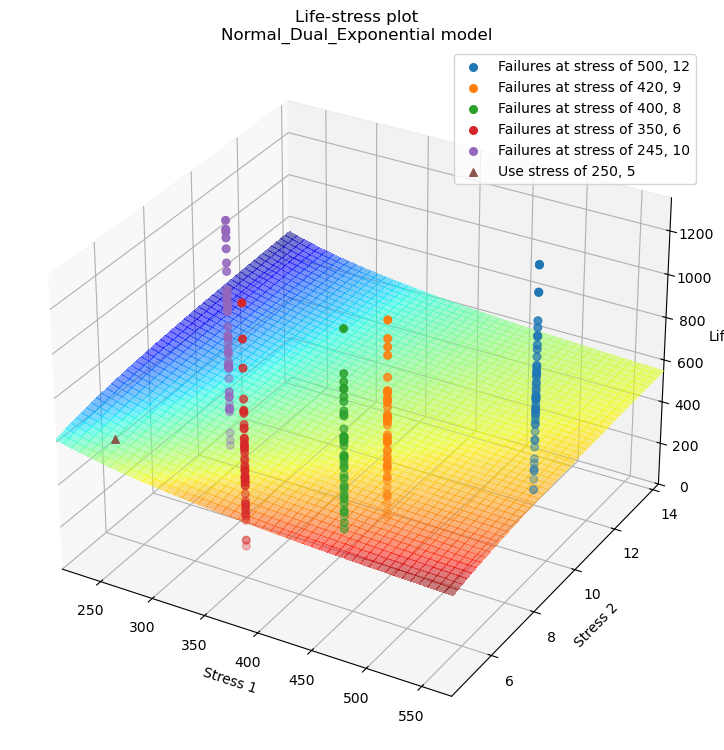

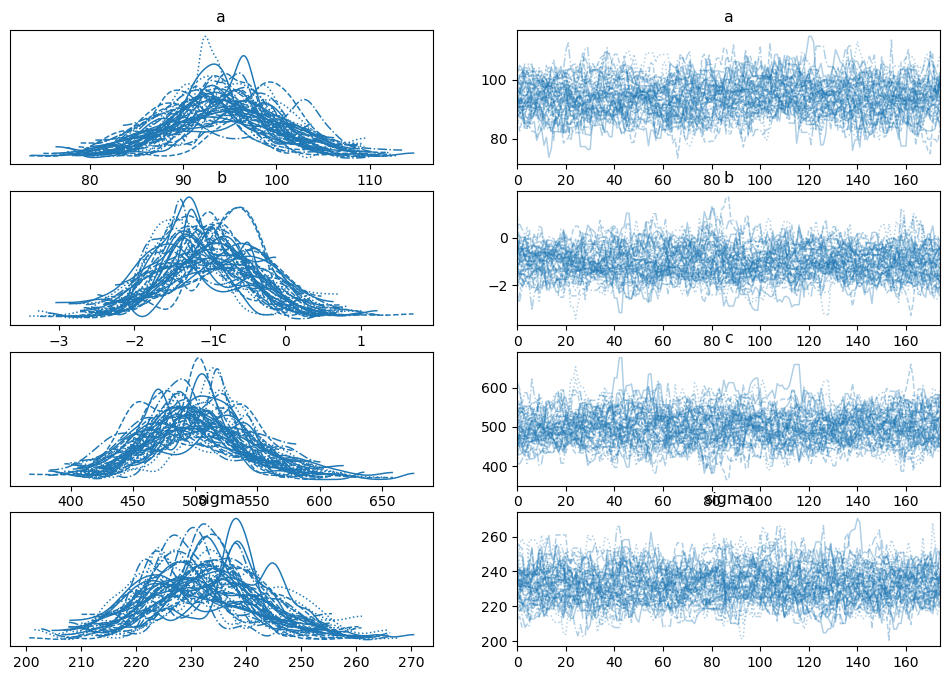

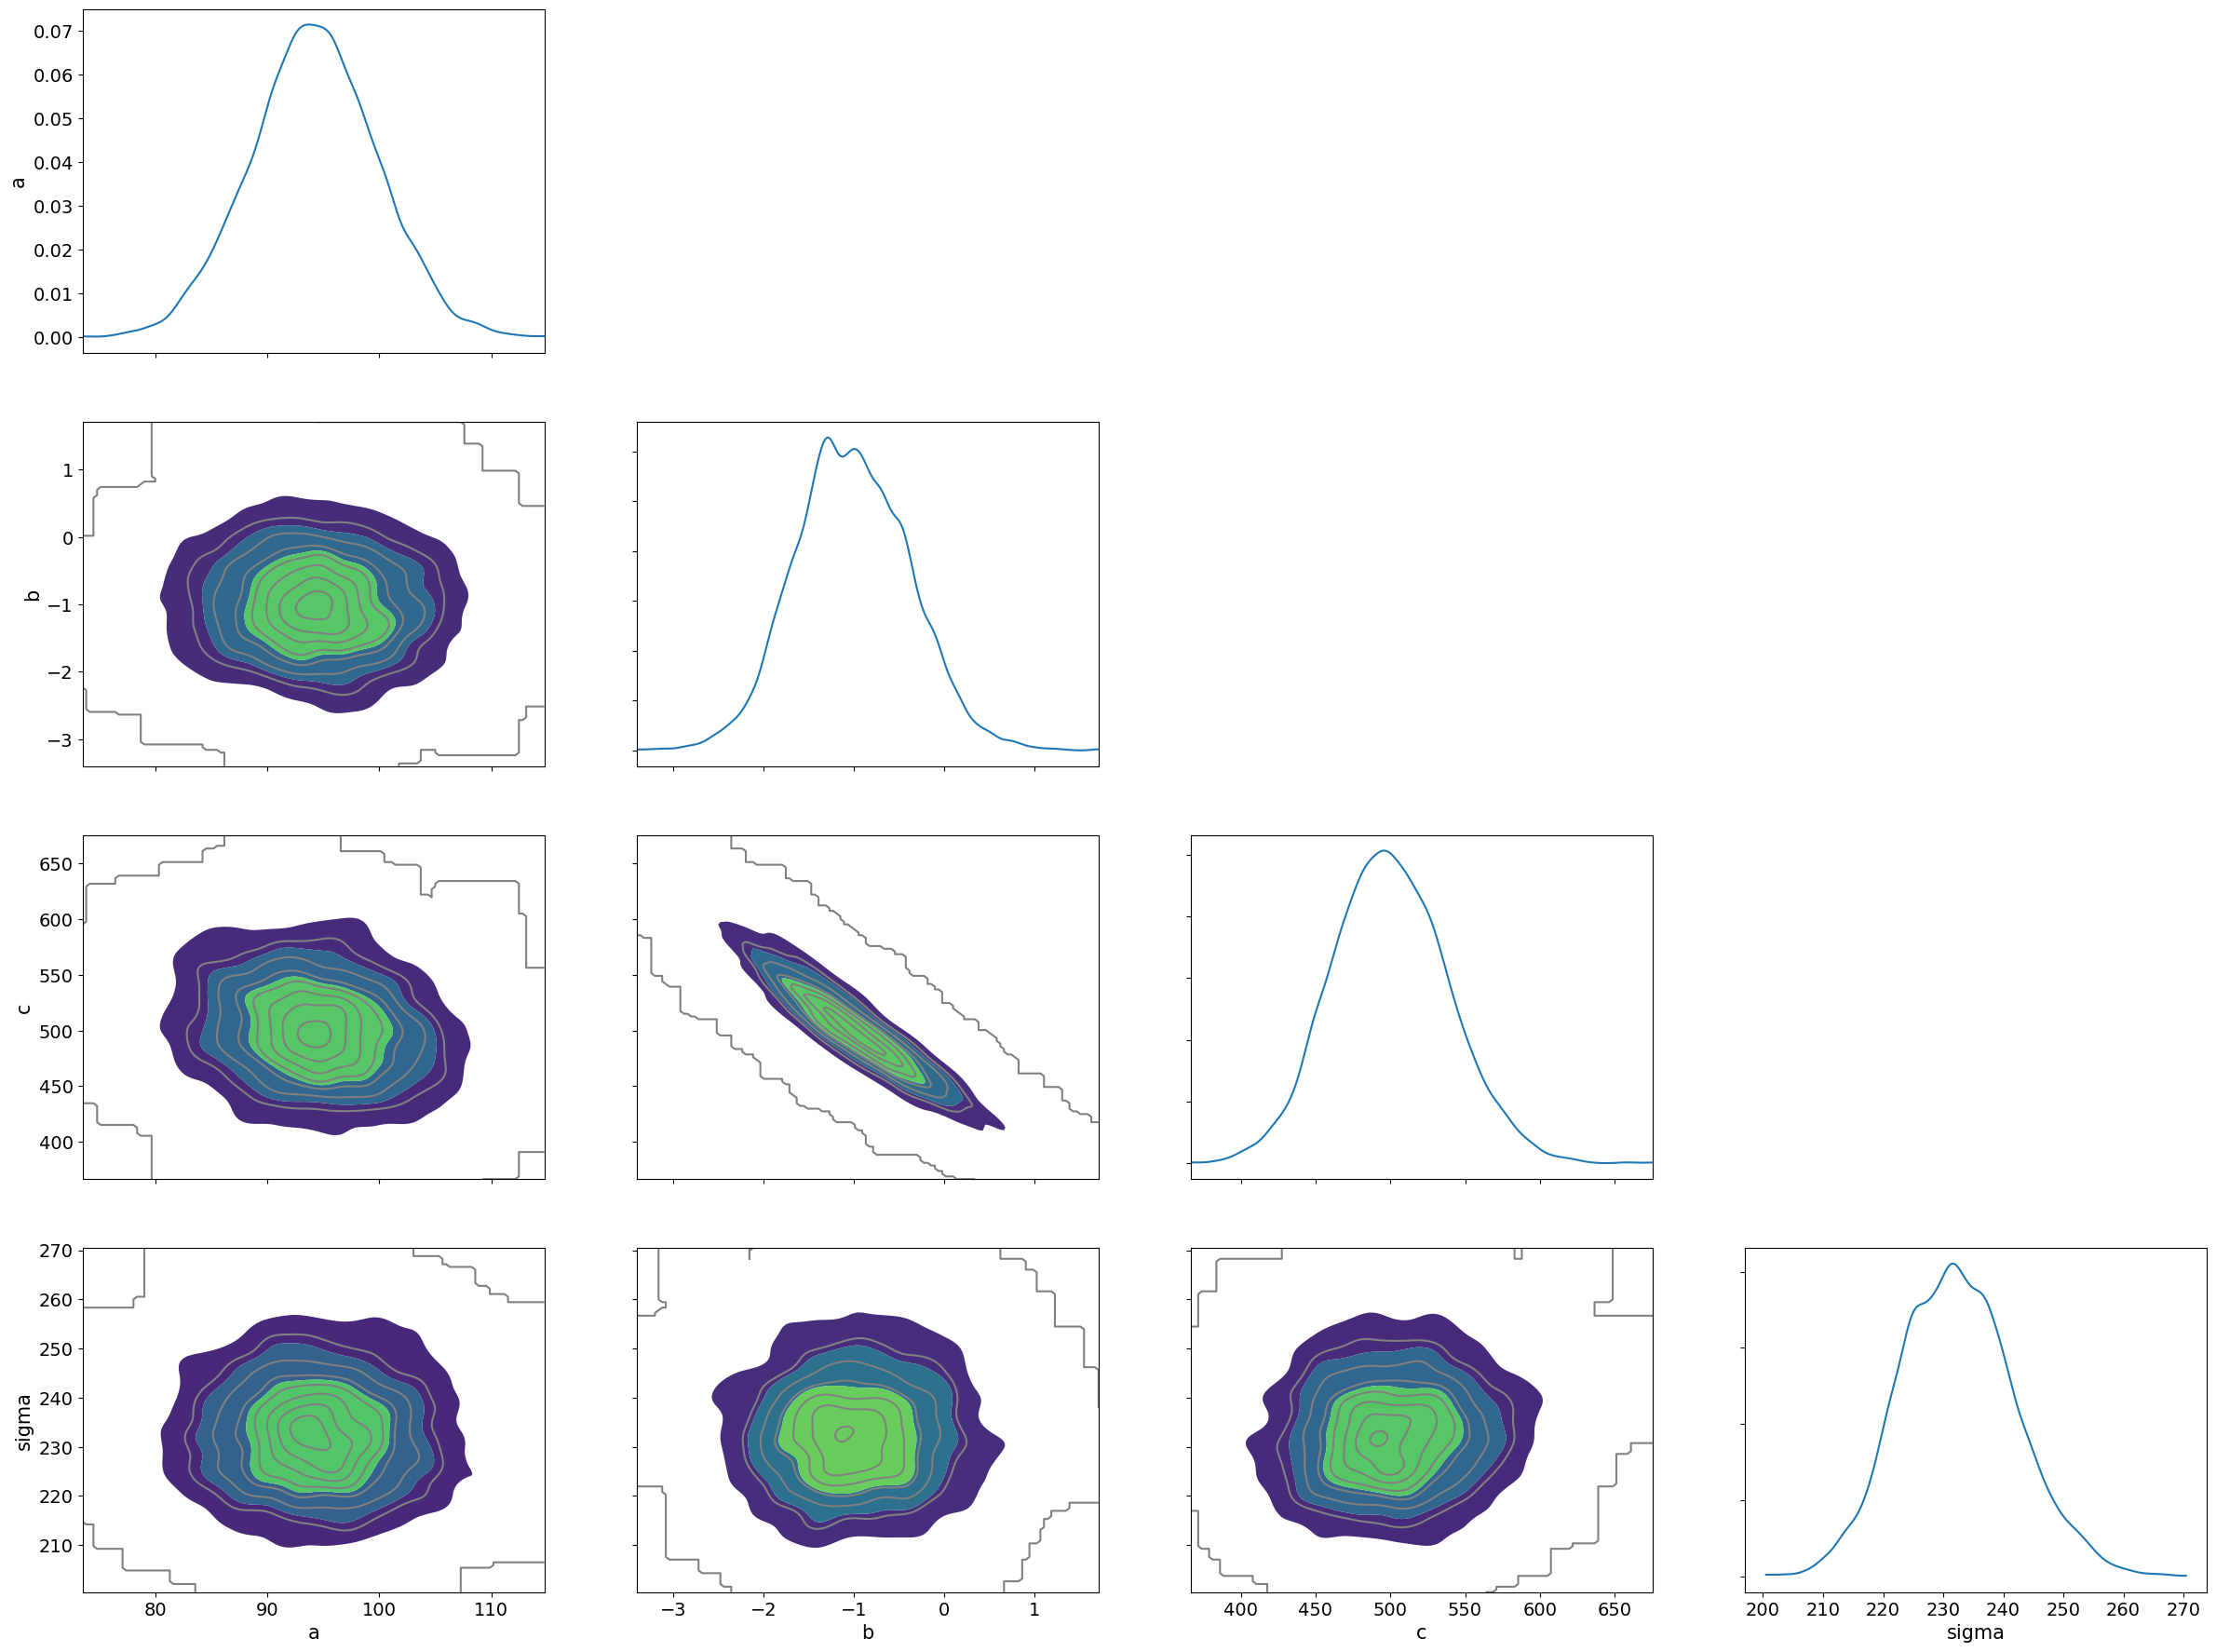

In [7]:
# Dual Exponential Fits
from reliability.ALT_Bayesian_fitters import (
    Fit_Weibull_Dual_Exponential_Bayesian, 
    Fit_Lognormal_Dual_Exponential_Bayesian, 
    Fit_Exponential_Dual_Exponential_Bayesian, 
    Fit_Normal_Dual_Exponential_Bayesian,
)

fit = Fit_Normal_Dual_Exponential_Bayesian(
    failures=ALT_data.failures, 
    failure_stress_1=ALT_data.failure_stresses_1, 
    failure_stress_2=ALT_data.failure_stresses_2, 
    right_censored=ALT_data.right_censored, 
    right_censored_stress_1=ALT_data.right_censored_stresses_1, 
    right_censored_stress_2=ALT_data.right_censored_stresses_2, 
    use_level_stress=use_level_stress,
    priors={
        'a': ("Normal", 95, 6),
        'b': ("Normal", -1, 1.0),
        'c': ("Lognormal", 6.0, 1.0),
        #'n': ("Normal", 0.0, 1.0),
        'sigma': ("Lognormal", 1.0, 1.0)
        # 'beta': ("Lognormal", 1.0, 1.0)
    },
    n_walkers=48, n_steps=500, burn=150, thin=2,
    show_bayes_plots=True,   # <— turn on ArviZ plots
    progress=True
)


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:10<00:00, 47.69it/s]


Results from Fit_Normal_Power_Exponential_Bayesian (95% CrI):
Analysis method: Bayesian Estimation
Failures / Right censored: 250/250 (50% right censored)

Parameter  Post Mean  Post Std  Post Median  Lower 95% CrI  Upper 95% CrI
        a    94.4162   6.09701      94.2968        82.4902        106.303
        c    331.543   70.8122      327.015        208.463        490.478
        n   0.142904 0.0964719     0.138914      -0.043113       0.344642
    sigma    231.427   9.54826      230.961        212.987        250.404 

At the use level stress(es) of [250, 5], the mean life (posterior) is 608.76



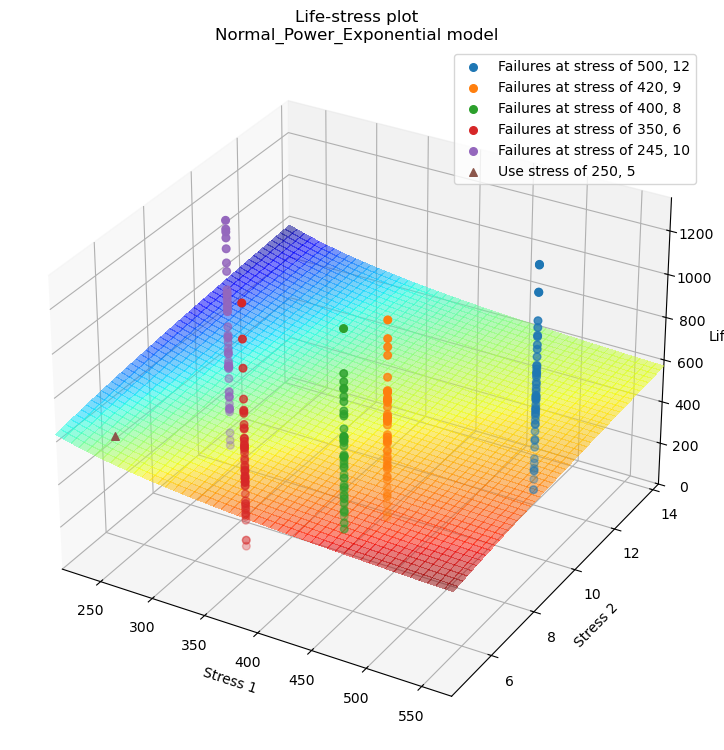

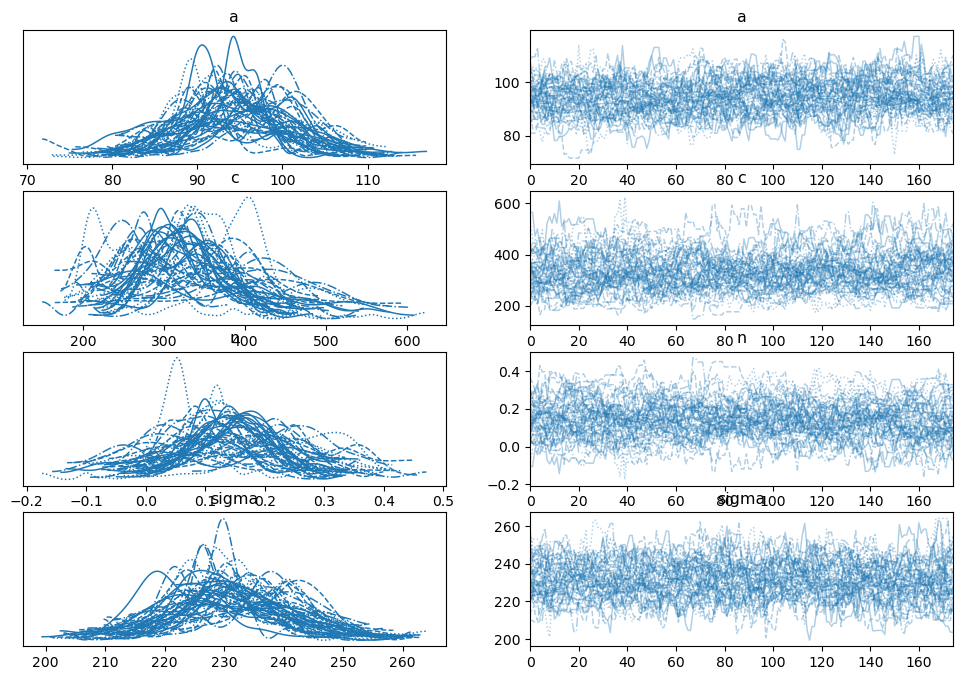

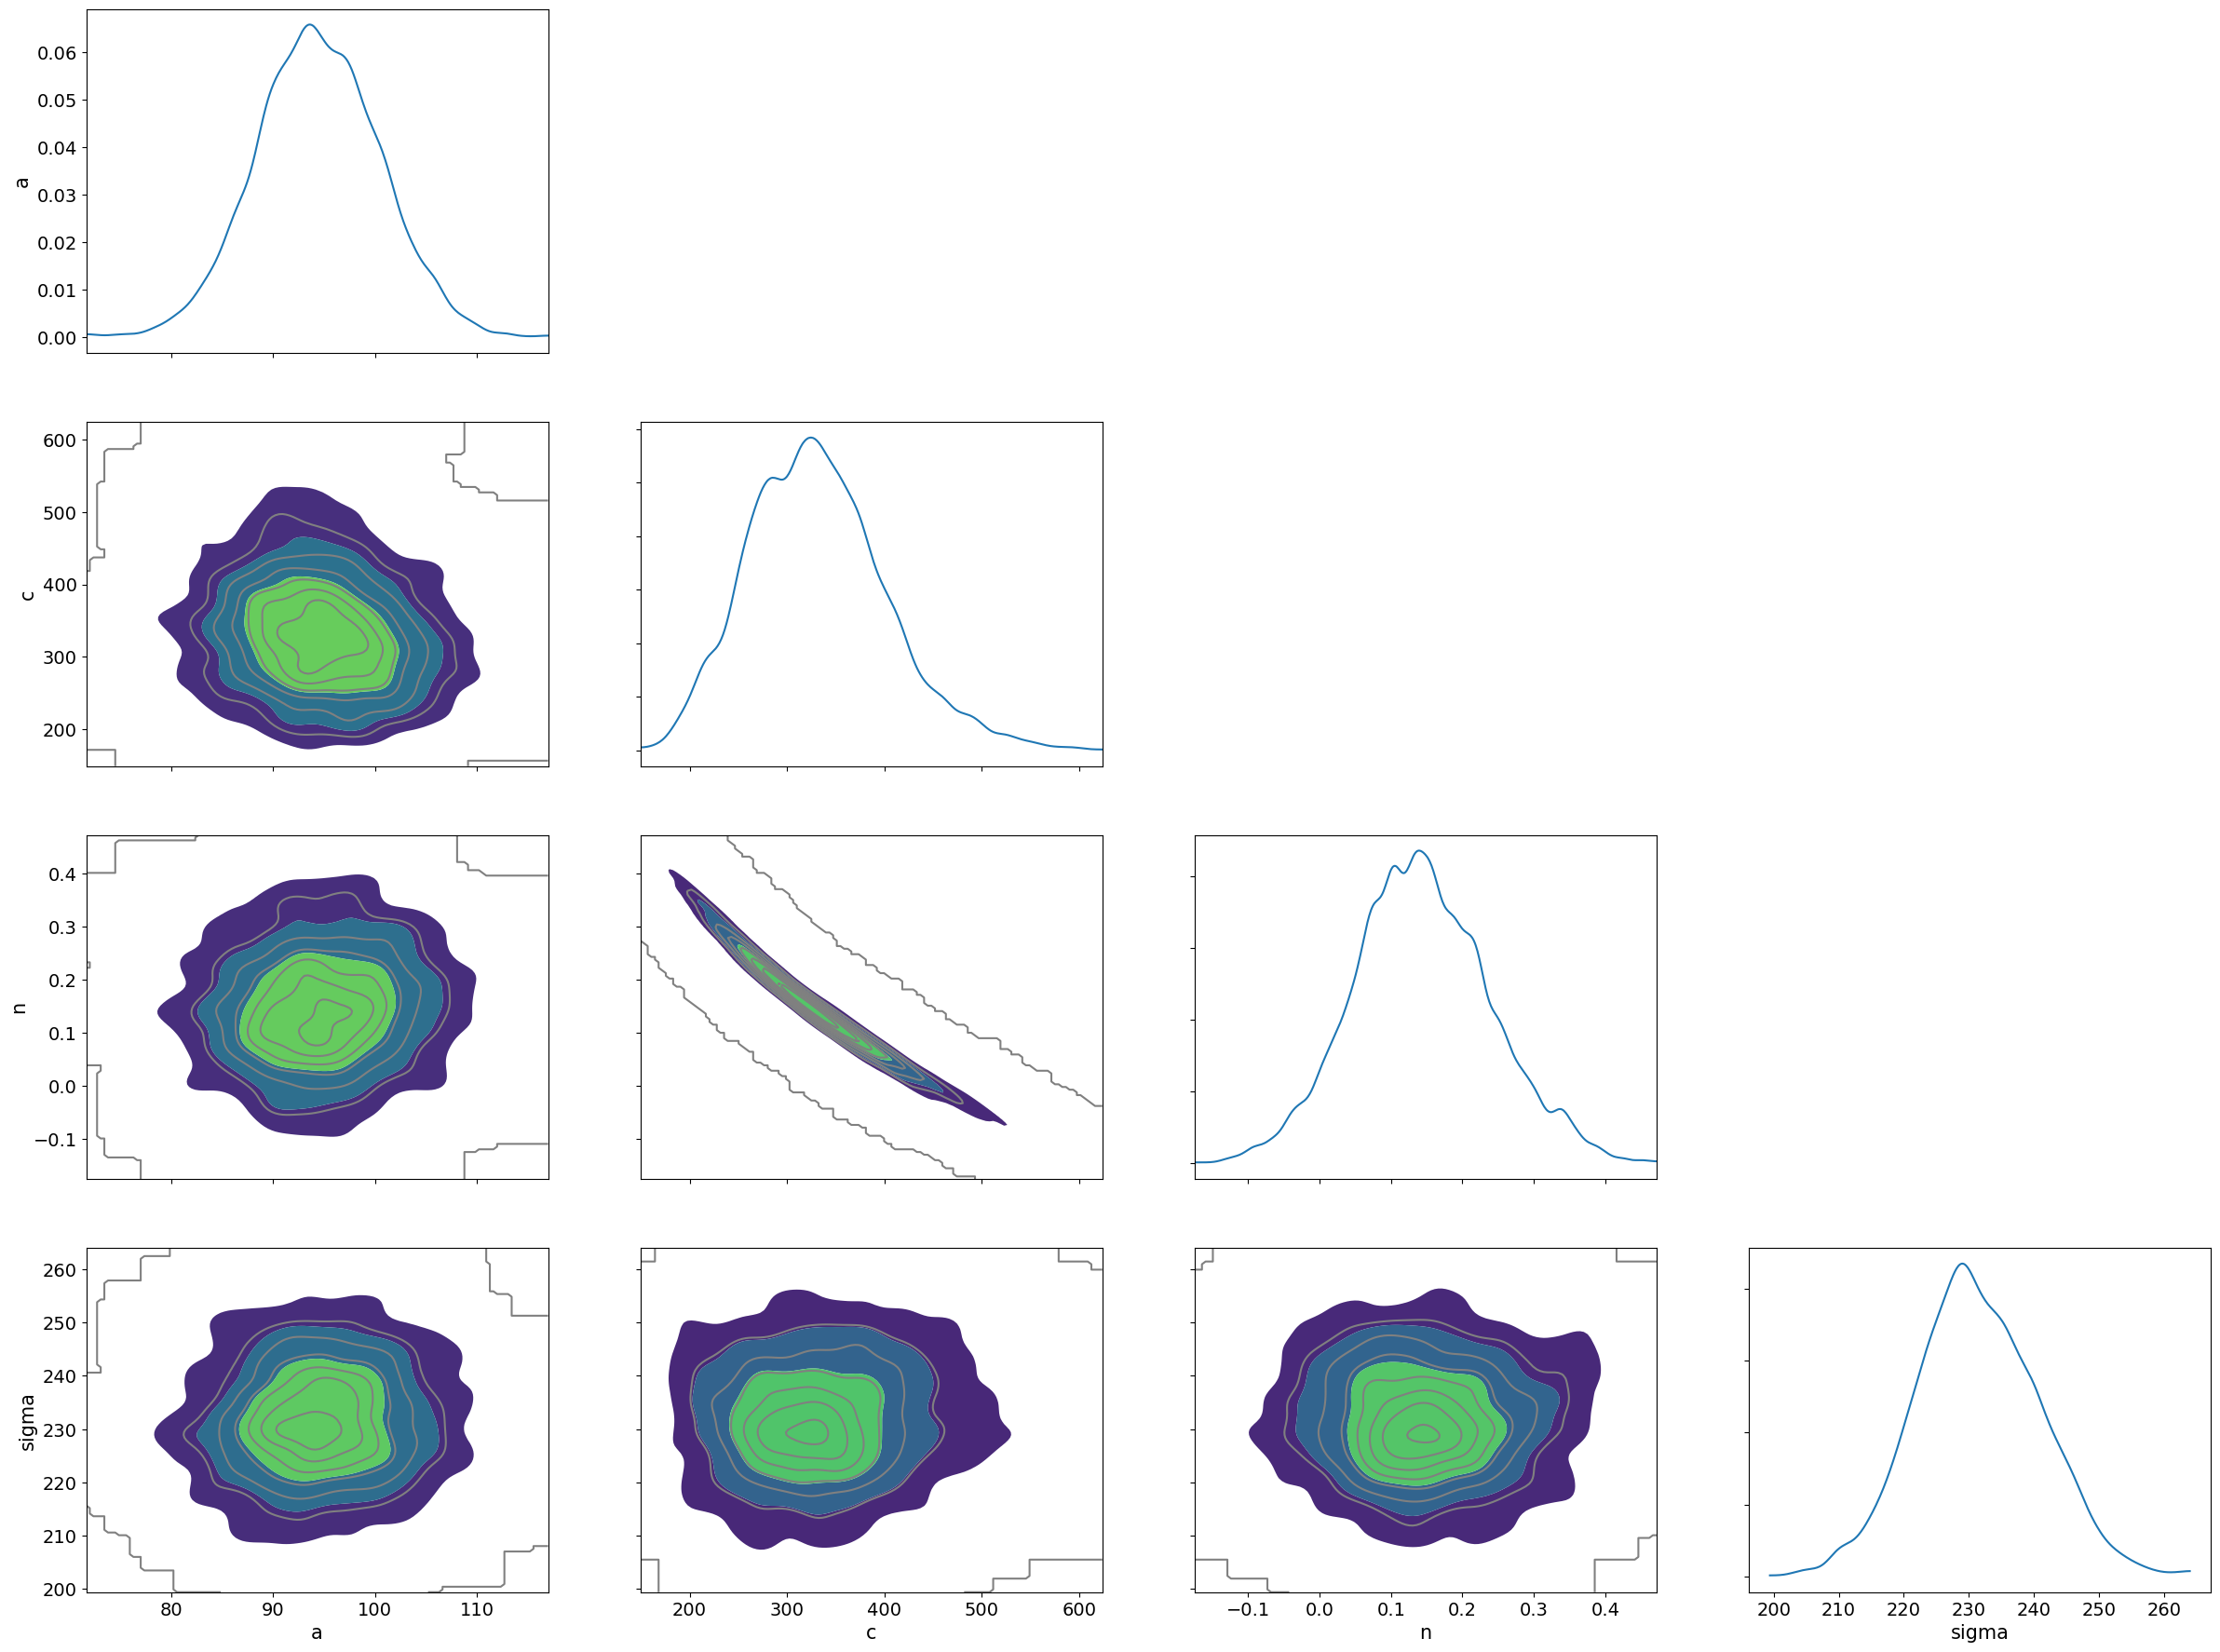

In [8]:
# Power Exponential fits
from reliability.ALT_Bayesian_fitters import (
    Fit_Weibull_Power_Exponential_Bayesian, 
    Fit_Lognormal_Power_Exponential_Bayesian, 
    Fit_Exponential_Power_Exponential_Bayesian, 
    Fit_Normal_Power_Exponential_Bayesian,
)

fit = Fit_Normal_Power_Exponential_Bayesian(
    failures=ALT_data.failures, 
    failure_stress_1=ALT_data.failure_stresses_1, 
    failure_stress_2=ALT_data.failure_stresses_2, 
    right_censored=ALT_data.right_censored, 
    right_censored_stress_1=ALT_data.right_censored_stresses_1, 
    right_censored_stress_2=ALT_data.right_censored_stresses_2, 
    use_level_stress=use_level_stress,
    priors={
        'a': ("Normal", 95, 6),
        'c': ("Lognormal", 5.0, 1.0),
        'n': ("Normal", 0.0, 1.0),
        'sigma': ("Lognormal", 1.0, 1.0)
        #'beta': ("Lognormal", 1.0, 1.0)
    },
    n_walkers=48, n_steps=500, burn=150, thin=2,
    show_bayes_plots=True,   # <— turn on ArviZ plots
    progress=True
)


In [14]:
import numpy as np
np.log(3e15)

np.float64(35.63738868357879)